## identificaiton des bord

In [1]:
#gestion fichier modeles pythons
import os , sys            
workpath = sys.path[0]

sys.path.append(f'{workpath}\fidle-env\lib\site-packages')

#modules utilitaires
import random as r
import numpy as np
import time as t
import fidle
   
#traitement image
import matplotlib.pyplot as plt   
from skimage import io 

#module IA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
from tensorflow.keras import activations
#traitement matrice
import cv2 


(-0.5, 255.5, 255.5, -0.5)

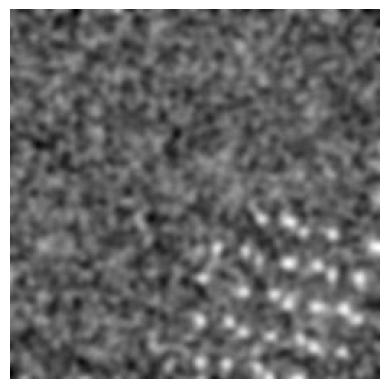

In [2]:
datapath = f'{workpath}\datasheet\mmClasses-DataBase-IMG\mmClasses-DataBase-IMG\data_256_fullmodif'
L = os.listdir(datapath)
img_read = io.imread (f'{datapath}/{L[1000]}', as_gray =  True)
fig, ax = plt.subplots()
plt.imshow(img_read, cmap ="gray") #avec couleur: enlevant , cmap ="gray"
plt.axis("off")

[[178 203 222 ... 208 214 218]
 [190 207 222 ... 199 205 211]
 [195 201 209 ... 194 202 209]
 ...
 [213 205 199 ... 128 132 134]
 [222 210 199 ... 125 129 132]
 [230 220 209 ... 126 127 128]]


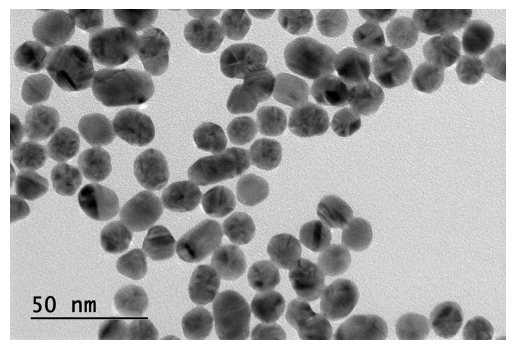

In [3]:
path_img_relle = img_read = f'{workpath}\qq_img_relle'
L = os.listdir(path_img_relle)
img_read = io.imread (f'{path_img_relle}/{L[0]}', as_gray =  True)
fig, ax = plt.subplots()
plt.imshow(img_read, cmap = "gray") #avec couleur: enlevant , cmap ="gray"
plt.axis("off")

print(img_read)

## fonction de convolution

In [4]:
#un fonction copie-coller sur internet
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output



## flitre de gausse

In [5]:
filtre_gausse= np.array([[1,2,1],[2,4,2],[1,2,1]])/16
print(filtre_gausse)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [6]:
img_filtre= convolve2D(img_read, filtre_gausse, padding=0, strides=1)

(-0.5, 2045.5, 1362.5, -0.5)

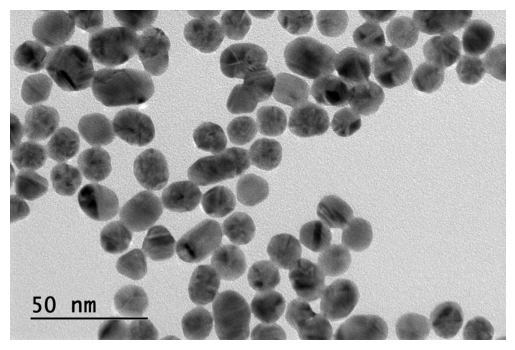

In [7]:
fig, ax = plt.subplots()
plt.imshow(img_filtre, cmap = "gray") #avec couleur: enlevant , cmap ="gray"
plt.axis("off")

## convolution pour identifier les bord

In [8]:
matrice_convo_vertical= np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(matrice_convo_vertical)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [9]:
matrice_convo_horizon= np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print(matrice_convo_horizon)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [10]:
img_bord_horizon = convolve2D(img_read, matrice_convo_horizon, padding=0, strides=1)
img_bord_vertical = convolve2D(img_read, matrice_convo_vertical, padding=0, strides=1)

In [11]:
gradient_img_gris= np.zeros(np.shape(img_bord_horizon))

In [12]:

if np.shape(img_bord_horizon) == np.shape(img_bord_vertical):
    x,y = np.shape(img_bord_horizon)
    for i in range(x-1):
        for j in range(y-1):
            gradient_img_gris[i][j] = img_bord_horizon[i][j]**2+img_bord_vertical[i][j]**2
            gradient_img_gris[i][j] = np.sqrt(gradient_img_gris[i][j])
            #gradient_img_gris[i][j] = gradient_img_gris[i][j]*100

In [13]:
print(gradient_img_gris)

[[122.          85.90692638  58.41232747 ...  41.03656906  56.93856338
    0.        ]
 [ 82.03657721 117.34564329 117.33712115 ...  41.10960958  31.144823
    0.        ]
 [ 48.0416486   93.05912099 111.83022847 ...  20.24845673  49.81967483
    0.        ]
 ...
 [ 33.01514804  38.20994635  30.2654919  ...  43.93176527  53.25410782
    0.        ]
 [ 53.53503526  21.02379604  40.         ...  26.          44.04543109
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [14]:
#img_bord = tf.nn.convolution(img_read,matrice_convo) #convolution de tf n'a jamais marche.

(-0.5, 2045.5, 1362.5, -0.5)

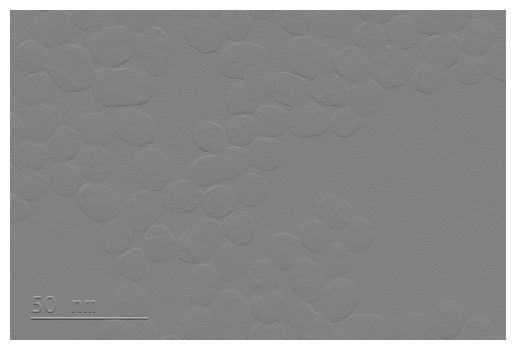

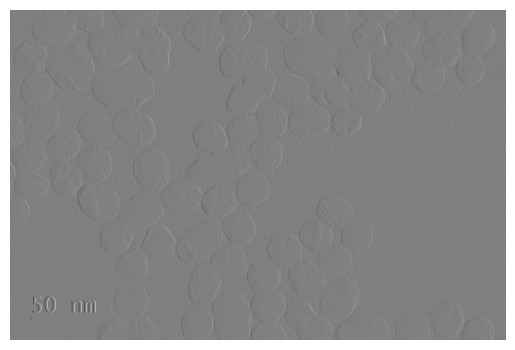

In [15]:
fig, ax = plt.subplots()
plt.imshow(img_bord_horizon, cmap = "gray") #avec couleur: enlevant , cmap ="gray"
plt.axis("off")


fig, ax = plt.subplots()
plt.imshow(img_bord_vertical, cmap = "gray") #avec couleur: enlevant , cmap ="gray"
plt.axis("off")



(-0.5, 2045.5, 1362.5, -0.5)

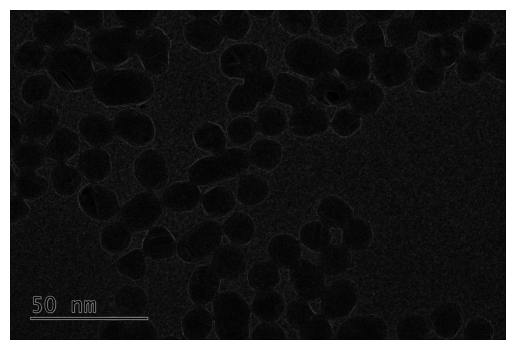

In [16]:
fig, ax = plt.subplots()
plt.imshow(gradient_img_gris,cmap = "gray") #avec couleur: enlevant , cmap ="gray"
plt.axis("off")

## filtrage et identification bord d'image avec cv2 (je le trouve le plus efficase)

In [2]:
datapath = f'{workpath}\datasheet\mmClasses-DataBase-IMG\mmClasses-DataBase-IMG\data_256_fullmodif'
L = os.listdir(datapath)
img_read = cv2.imread(f'{datapath}/{L[1000]}', 0)


In [5]:
path_img_relle = img_read = f'{workpath}\qq_img_relle'
L = os.listdir(path_img_relle)
img_read = cv2.imread(f'{path_img_relle}/{L[0]}', 0)

In [6]:
img_filtre=cv2.fastNlMeansDenoising(img_read,h=20,templateWindowSize=7,searchWindowSize=21)
canny = cv2.Canny(img_filtre, 50, 150)
cv2.namedWindow('bord img', cv2.WINDOW_NORMAL) #window_normal nous permettre de modifier la forme de fenetre d'img
cv2.imshow('bord img', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

## visualisation des image filtré

In [4]:


img_filtre=cv2.fastNlMeansDenoising(img_read,h=20,templateWindowSize=7,searchWindowSize=21)
#img_filtre = cv2.GaussianBlur(img_read,(9,9),0)
cv2.namedWindow('img filtre', cv2.WINDOW_NORMAL)
cv2.imshow('img filtre', img_filtre)
cv2.waitKey(0) #attend infinitivement mon clique de souris ou clavier
cv2.destroyAllWindows()